In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

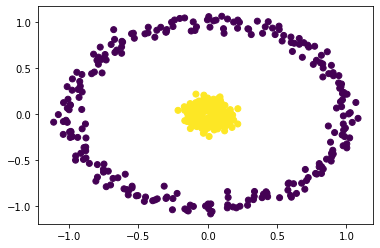

In [ ]:
X, y = make_circles(500, factor=0.1, noise=0.05)
y = y.reshape(500, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
class NeuralNet():
  def __init__(self, n_inputs=2, n_hidden=[4, 8, 4], n_outputs=1):
    self.n_inputs = n_inputs
    self.n_hidden = n_hidden
    self.n_outputs = n_outputs
    layers = [n_inputs] + n_hidden + [n_outputs]
    self.layers = layers

    # inicializar pesos y matrices de derivadas
    weights = []
    derivatives = []
    bias = []
    for i in range(len(layers) - 1):
      w = np.random.normal(scale=0.5, size=(layers[i], layers[i + 1]))
      d = np.zeros((layers[i], layers[i + 1]))
      b = np.zeros((1, layers[i + 1]))
      weights.append(w)
      derivatives.append(d)
      bias.append(b)
    self.weights = weights
    self.derivatives = derivatives
    self.bias = bias

    # inicializar activaciones
    activations = []
    for i in range(len(layers)):
      a = np.zeros((1, layers[i]))
      activations.append(a)
    self.activations = activations

    # deltas (gradient descent bias)
    deltas = []
    for i in range(len(bias)):
      d = np.zeros((bias[i].shape))
      deltas.append(d)
    self.deltas = deltas

  def forward(self, inputs):
    self.activations[0] = inputs
    z = np.dot(inputs, self.weights[0]) + self.bias[0]
    a = self.relu(z)
    self.activations[1] = a
    for i in range(len(self.layers) - 2):
      z = np.dot(a, self.weights[i + 1]) + self.bias[i + 1]
      a = self.relu(z)
      self.activations[i + 2] = a
    return self.activations[-1]

  def backpropagation(self, error):
    back = list(range(len(self.layers) - 1))
    back.reverse()
    for i in back:
      a = self.activations[i + 1]
      delta = error * self.relu_der(a)
      self.deltas[i] = delta
      a_current = self.activations[i]
      d = np.dot(a_current.T, delta)
      self.derivatives[i] = d
      error = np.dot(delta, self.weights[i].T)

  def gradient_descent(self, lr):
    for i in range(len(self.weights)):
      w = self.weights[i]
      d = self.derivatives[i]
      w -= d * lr
      self.weights[i] = w
      self.bias[i] -= np.mean(self.deltas[i], axis=0, keepdims=True)

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def sigmoid_der(self, x):
    return x * (1 - x)

  def relu(self, x):
    return np.maximum(0, x)

  def relu_der(self, x):
    return x > 0 * 1

  def mse(self, output, target):
    return np.mean((output - target) ** 2) / 2

  def train(self, X, y, lr, err_max):
    err_mse = 1
    errors = []
    while err_mse > err_max:
      output = self.forward(X)
      error = output - y
      self.backpropagation(error)
      self.gradient_descent(lr)
      err_mse = self.mse(output, y)
      errors.append(err_mse)
      if len(errors) % 100 == 0:
             print(err_mse)

    x_axis = range(0, len(errors))
    plt.plot(x_axis, errors)

1/2 (output - y) ^ 2 \\
1/2 (sigm(z2) - y) ^ 2 \\
1/2 (sigm(a1*W2 + bias) - y) ^ 2 \\
DERIVADA W2: \\
(output - y) * sigm'(z2) \\

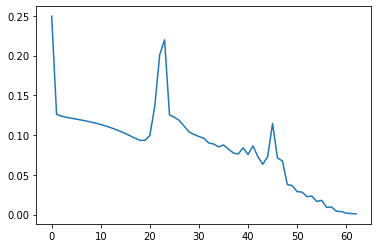

In [ ]:

nn = NeuralNet(2, [4, 8, 4], 1)
nn.train(X, y, 0.002, 0.001)